In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error

# Классная работа

## Задача классификации

In [ ]:
RANDOM_SEED = np.random.seed()

Text(0, 0.5, 'X2')

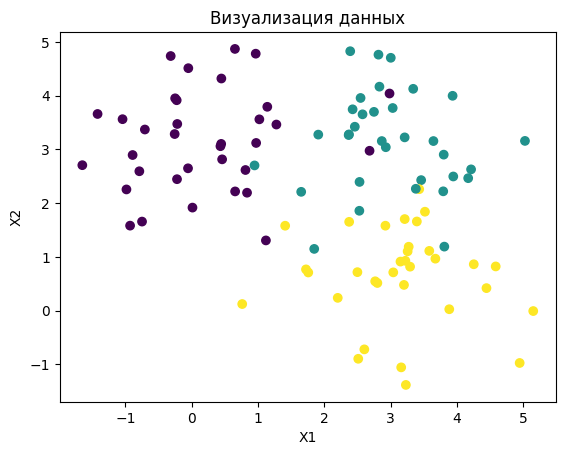

In [ ]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                  n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

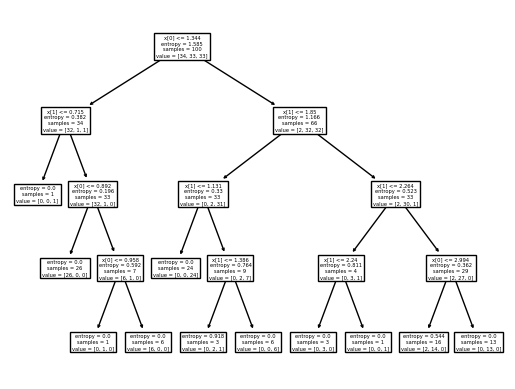

In [ ]:
plot_tree(clf_tree)
plt.show()

In [ ]:
print(export_text(clf_tree))

|--- feature_0 <= 1.34
|   |--- feature_1 <= 0.72
|   |   |--- class: 2
|   |--- feature_1 >  0.72
|   |   |--- feature_0 <= 0.89
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.89
|   |   |   |--- feature_0 <= 0.96
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.96
|   |   |   |   |--- class: 0
|--- feature_0 >  1.34
|   |--- feature_1 <= 1.85
|   |   |--- feature_1 <= 1.13
|   |   |   |--- class: 2
|   |   |--- feature_1 >  1.13
|   |   |   |--- feature_1 <= 1.39
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.39
|   |   |   |   |--- class: 2
|   |--- feature_1 >  1.85
|   |   |--- feature_1 <= 2.26
|   |   |   |--- feature_1 <= 2.24
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.24
|   |   |   |   |--- class: 2
|   |   |--- feature_1 >  2.26
|   |   |   |--- feature_0 <= 2.99
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  2.99
|   |   |   |   |--- class: 1



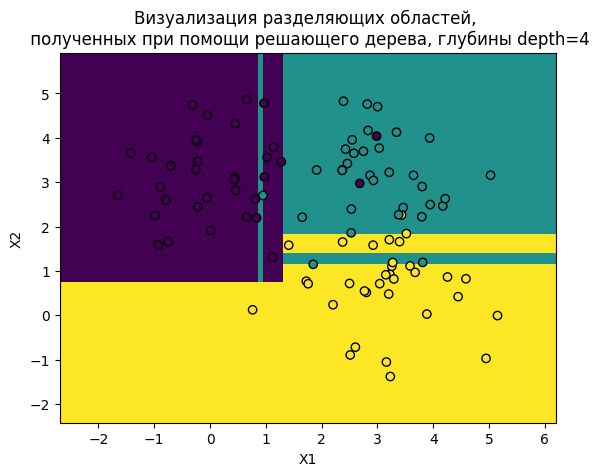

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[32  2  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.97
F1_score = 0.97


In [ ]:
observation_new = [[2, 1]]
clf_tree.predict(observation_new)

array([2])

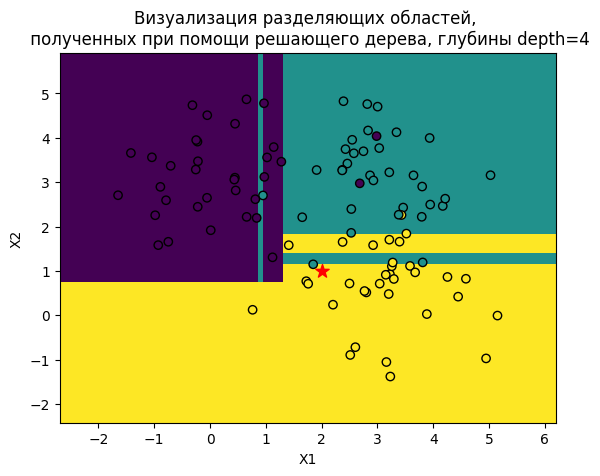

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='r')

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Задача регрессии

In [ ]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

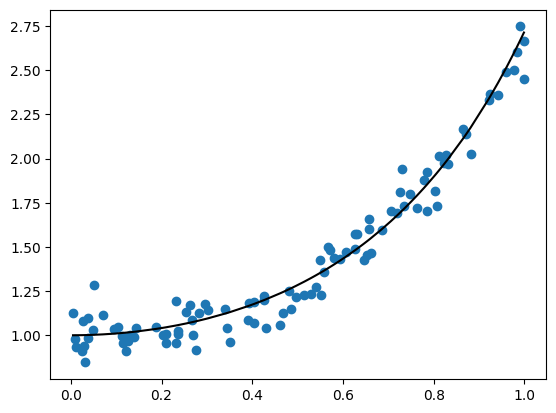

In [ ]:
yy = np.exp(X**2)
plt.scatter(X, y)
plt.plot(X, yy, c='black')
plt.show()

In [ ]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=3)

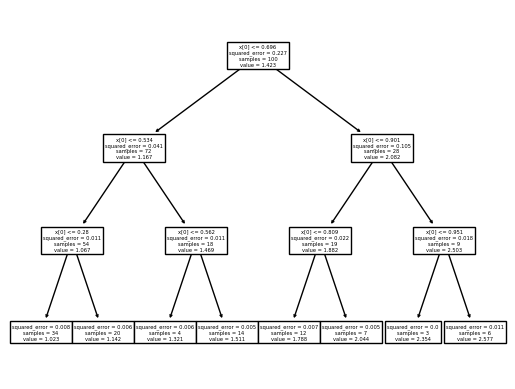

In [ ]:
plot_tree(reg_tree)
plt.show()

In [ ]:
y_pred_reg = reg_tree.predict(X.reshape(-1, 1))
y_pred_reg[:5]

array([1.02265046, 1.02265046, 1.02265046, 1.02265046, 1.02265046])

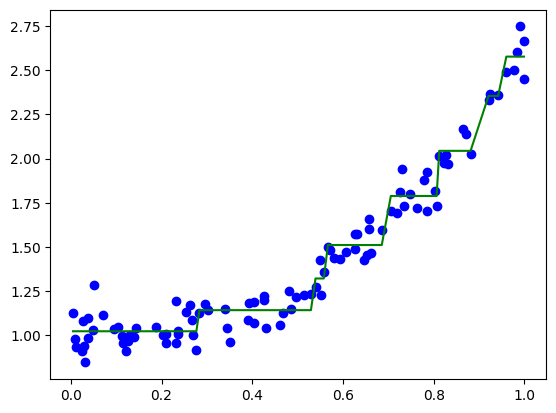

In [ ]:
plt.scatter(X, y, c="b")
plt.plot(X, y_pred_reg, c='g')
plt.show()

In [ ]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9703946121235676
MSE=  0.006732204133331306


In [ ]:
observation_new = [[0.7]]
observation_new_pred = reg_tree.predict(observation_new)

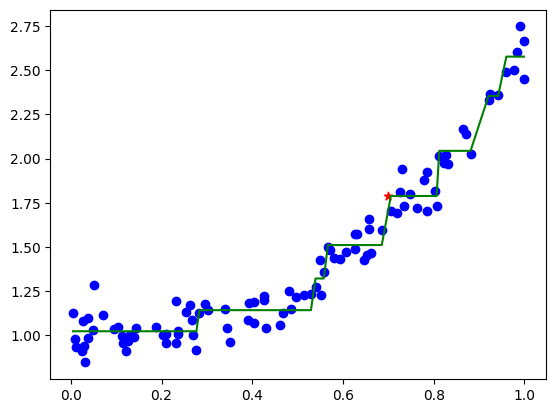

In [ ]:
plt.scatter(X, y, c="b")
plt.scatter(observation_new[0], observation_new_pred, marker='*', c='r')
plt.plot(X, y_pred_reg, c='g')
plt.show()

# Задания для самостоятельного выполнения

## 1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

In [7]:
data = load_iris()
data.keys(), data['feature_names']

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [8]:
X = data['data'][:,2:]
y = data['target']
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

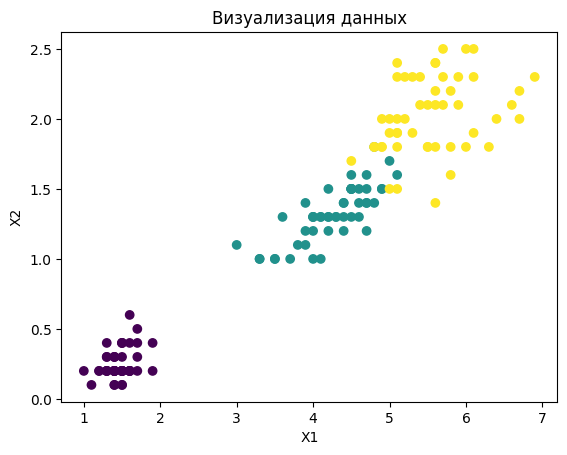

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## 2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

In [ ]:
iris_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
iris_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

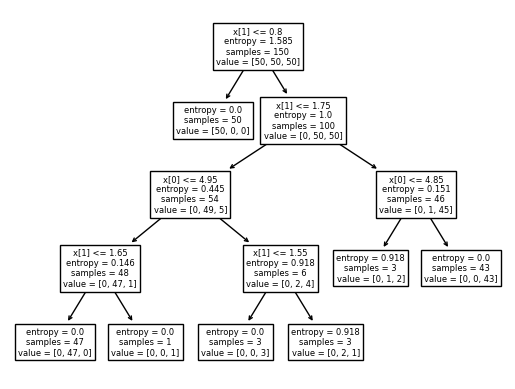

In [ ]:
plot_tree(iris_tree)
plt.show()

## 3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

In [9]:
def vis(tree, depth):
  X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
  X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
  X0_grid, X1_grid = np.meshgrid(X0, X1)

  y_predict = tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
  plt.pcolormesh(X0_grid, X1_grid, y_predict)

  plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

  plt.title(f'Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={depth}')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.show()

In [10]:
iris_tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
iris_tree1.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

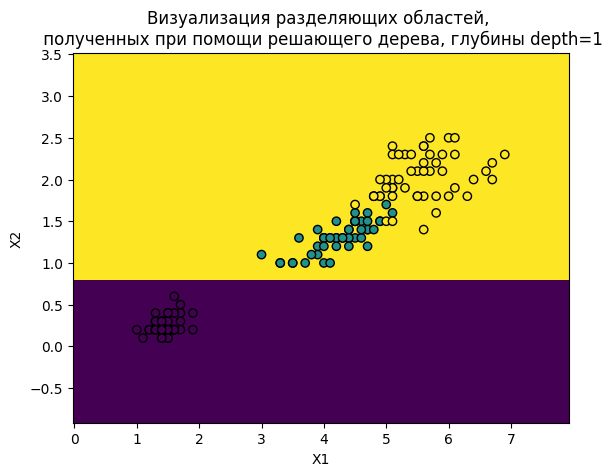

In [11]:
vis(iris_tree1, 1)

In [12]:
iris_tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
iris_tree2.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

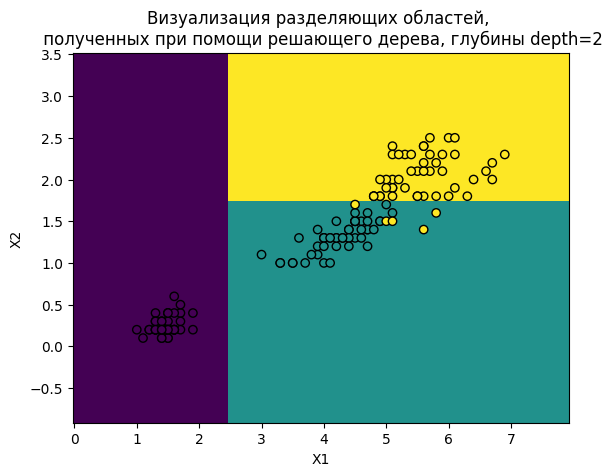

In [13]:
vis(iris_tree2, 2)

In [26]:
iris_tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
iris_tree3.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

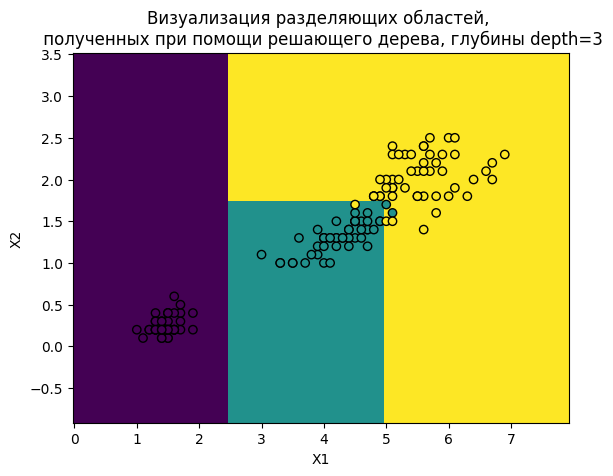

In [27]:
vis(iris_tree3, 3)

In [22]:
iris_tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
iris_tree4.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

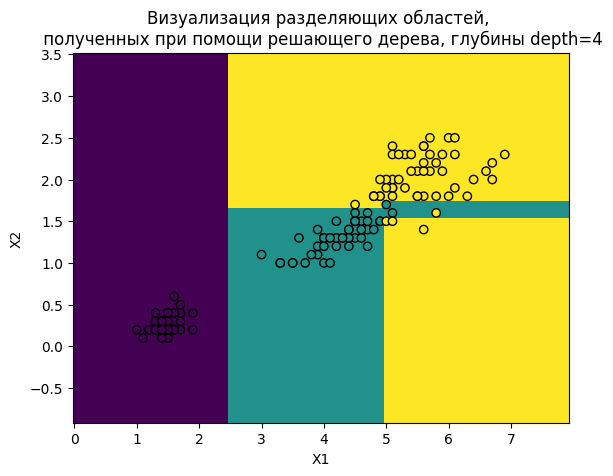

In [23]:
vis(iris_tree4, 4)

In [24]:
iris_tree10 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
iris_tree10.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

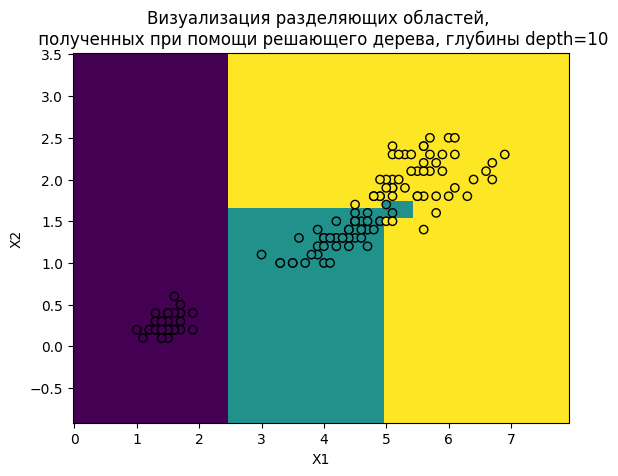

In [25]:
vis(iris_tree10, 10)

## 4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [28]:
y_pred1 = iris_tree1.predict(X)
y_pred2 = iris_tree2.predict(X)
y_pred3 = iris_tree3.predict(X)
y_pred4 = iris_tree4.predict(X)
y_pred10 = iris_tree10.predict(X)

In [29]:
print('Глубина = 1')
print('Accuracy =', round(accuracy_score(y, y_pred1), 3))
print('F1_score =', round(f1_score(y, y_pred1, average='micro'), 3), '\n')
print('Глубина = 2')
print('Accuracy =', round(accuracy_score(y, y_pred2), 3))
print('F1_score =', round(f1_score(y, y_pred2, average='micro'), 3), '\n')
print('Глубина = 3')
print('Accuracy =', round(accuracy_score(y, y_pred3), 3))
print('F1_score =', round(f1_score(y, y_pred3, average='micro'), 3), '\n')
print('Глубина = 4')
print('Accuracy =', round(accuracy_score(y, y_pred4), 3))
print('F1_score =', round(f1_score(y, y_pred4, average='micro'), 3), '\n')
print('Глубина = 10')
print('Accuracy =', round(accuracy_score(y, y_pred10), 3))
print('F1_score =', round(f1_score(y, y_pred10, average='micro'), 3),'\n')

Глубина = 1
Accuracy = 0.667
F1_score = 0.667 

Глубина = 2
Accuracy = 0.96
F1_score = 0.96 

Глубина = 3
Accuracy = 0.973
F1_score = 0.973 

Глубина = 4
Accuracy = 0.987
F1_score = 0.987 

Глубина = 10
Accuracy = 0.993
F1_score = 0.993 



**Лучше всего классифицирует модель с глубиной 4**

## 5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [ ]:
X = data['data']
y = data['target']
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris_class = DecisionTreeClassifier(criterion='entropy', max_depth=4)
iris_class.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[]

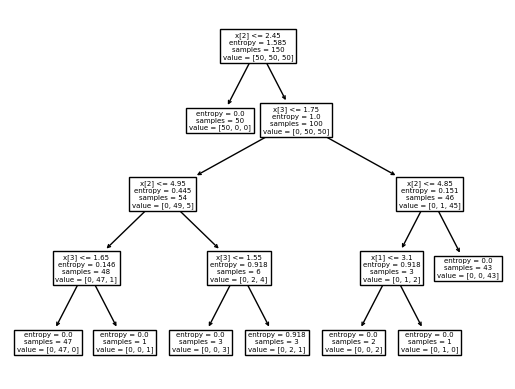

In [ ]:
plot_tree(iris_class)
plt.plot()

In [ ]:
y_pred = iris_class.predict(X)
print('Accuracy =', round(accuracy_score(y, y_pred), 3))
print('F1_score =', round(f1_score(y, y_pred, average='micro'), 3),'\n')

Accuracy = 0.993
F1_score = 0.993 



## 6. Загрузите встроенные данные sklearn.datasets.fetch_california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

In [2]:
data = fetch_california_housing()
data.keys(), data['feature_names']

(dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']),
 ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])

In [3]:
X = data['data'][:,3]
y = data['target']
X.shape, y.shape

((20640,), (20640,))

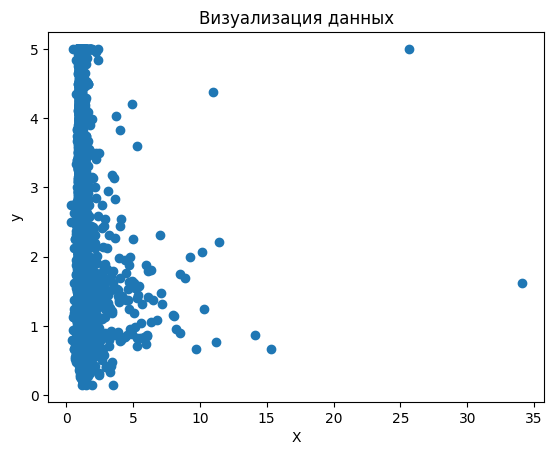

In [4]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Визуализация данных')
plt.show()

## 7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [5]:
house_tree = DecisionTreeRegressor(random_state=0)
house_tree.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(random_state=0)

## 8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

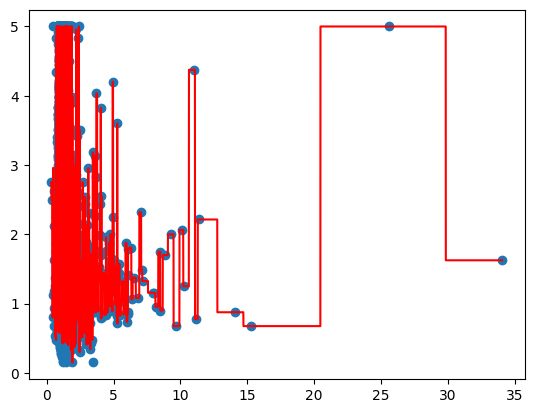

In [ ]:
xx = np.linspace(min(X), max(X), X.shape[0])
y_pred_reg = house_tree.predict(xx.reshape(-1, 1))
plt.scatter(X, y)
plt.plot(xx, y_pred_reg, c='r')
plt.show()

## 9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [ ]:
print('r2= ', round(r2_score(y, y_pred_reg), 2))
print('MSE= ', round(mean_squared_error(y, y_pred_reg), 2))

r2=  0.68
MSE=  0.43


In [ ]:
observation_new = [[12.7]]
observation_new_pred = house_tree.predict(observation_new)
observation_new_pred

array([2.214])

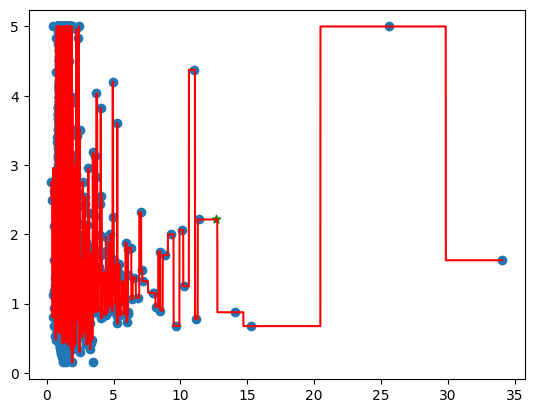

In [ ]:
xx = np.linspace(min(X), max(X), X.shape[0])
y_pred_reg = house_tree.predict(xx.reshape(-1, 1))
plt.scatter(X, y)
plt.plot(xx, y_pred_reg, c='r')
plt.scatter(observation_new, observation_new_pred, c='g', marker='*')
plt.show()

## 10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

In [ ]:
X = data['data']
y = data['target']
X.shape, y.shape

((20640, 8), (20640,))

In [ ]:
house_tree = DecisionTreeRegressor(random_state=0)
house_tree.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [ ]:
plot_tree(house_tree)
plt.show()

In [ ]:
y_pred_reg = house_tree.predict(X)

In [ ]:
print('r2= ', round(r2_score(y, y_pred_reg), 2))
print('MSE= ', round(mean_squared_error(y, y_pred_reg), 2))

r2=  1.0
MSE=  0.0
